In [6]:
import random
import pandas as pd
import numpy as np
import math
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score



In [2]:
def train_validate_test_split(data,labels, testRatio = 0.25, valRatio=0):
    arraySize = len(data)
    testSetData = list()
    testSetLabels = list()
    valSetData = list()
    valSetLabels = list()
    while(len(testSetData) < math.floor(arraySize*testRatio)):
        ind = random.randrange(len(data))
        testSetData.append(data[ind])
        testSetLabels.append(labels[ind])
        data = np.delete(data,ind,axis = 0)
        labels = np.delete(labels, ind, axis = 0)

    arraySize = len(data)
    while (len(valSetData) < math.floor(arraySize * valRatio)):
        ind = random.randrange(len(data))
        valSetData.append(data[ind])
        valSetLabels.append(labels[ind])
        data = np.delete(data, ind, axis = 0)
        labels = np.delete(labels, ind, axis = 0)

    test_Set_Data = np.array(testSetData)
    test_Set_Labels = np.array(testSetLabels)
    val_Set_Data = np.array(valSetData)
    val_Set_Labels = np.array(valSetLabels)
    if(valRatio == 0):
        return data, test_Set_Data, labels, test_Set_Labels
    else:
        return data, val_Set_Data, test_Set_Data, labels, val_Set_Labels, test_Set_Labels


In [3]:
def calculate_accuracy(predicted_y, y):
    guessWrong = 0
    if(len(predicted_y) == len(y)):
        ind = 0
        for i in predicted_y:
            if(i != y[ind]):
                guessWrong = guessWrong + 1
            ind+=1
        acc = ( (len(predicted_y)- guessWrong) / len(predicted_y))
        return acc
    return 0



In [4]:

iris = load_iris() # Sepal Length, Sepal Width, Petal Length and Petal Width
X = iris.data
Y = iris.target
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
#My split function
X_train, X_test, Y_train, Y_test = train_validate_test_split(X, Y, testRatio = 0.25)
gaussNB = GaussianNB()
y_pred = gaussNB.fit(X_train, Y_train).predict(X_test)
print("Our train_validate_test_split with my accuracy function: {}".format(calculate_accuracy(y_pred, Y_test)))
print("Our train_validate_test_split with  Built-in accuracy: {}".format(accuracy_score(y_pred,Y_test)))




Our train_validate_test_split with my accuracy function: 0.9459459459459459
Our train_validate_test_split with  Built-in accuracy: 0.9459459459459459


In [15]:
#Built-on spilt function
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.25)
gauss = GaussianNB()
y_pred_1 = gauss.fit(X_train_1, Y_train_1).predict(X_test_1)
print("Built-in train_test_split with my accuracy function: {}".format(calculate_accuracy(y_pred_1, Y_test_1)))
print("Built-in train_test_split with Built-in accuracy: {}".format(accuracy_score(y_pred_1,Y_test_1)))


Built-in train_test_split with my accuracy function: 0.9210526315789473
Built-in train_test_split with Built-in accuracy: 0.9210526315789473


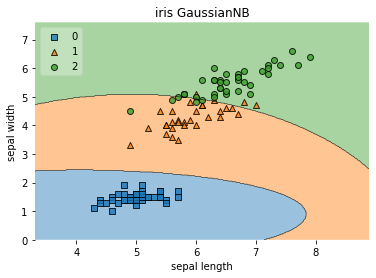

In [9]:
#Sending 2 features 
X_up = X_train[:,[0,2]]
plot_decision_regions(X_up, Y_train, clf=GaussianNB().fit(X_up,Y_train), legend=2)
# Adding axes annotations
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('iris GaussianNB')
plt.show()